# Time Series Visualization with `plot_multiple_series`

This notebook demonstrates how to use the `plot_multiple_series` method from the `DataVisualization` class to visualize time series data, including:

- Simple usage with multiple time series,
- Using subplots for different groups,
- Trends, Seasonality and noise,
- Missing values (events).

The function returns a `matplotlib.figure.Figure` object and is useful for exploratory data analysis and visual reports.

## Using mock data as example

We start by importing the required libraries and defining the `DataVisualization` class, which includes the static method `plot_multiple_series`.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization

### Example 1: Simple usage with multiple time series

We generate a random time series with daily frequency. The `plot_multiple_series` method is used to display the values with a custom title and labeled axes.

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/multiple_time_series.png'


/tmp/ipykernel_11944/1992932281.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


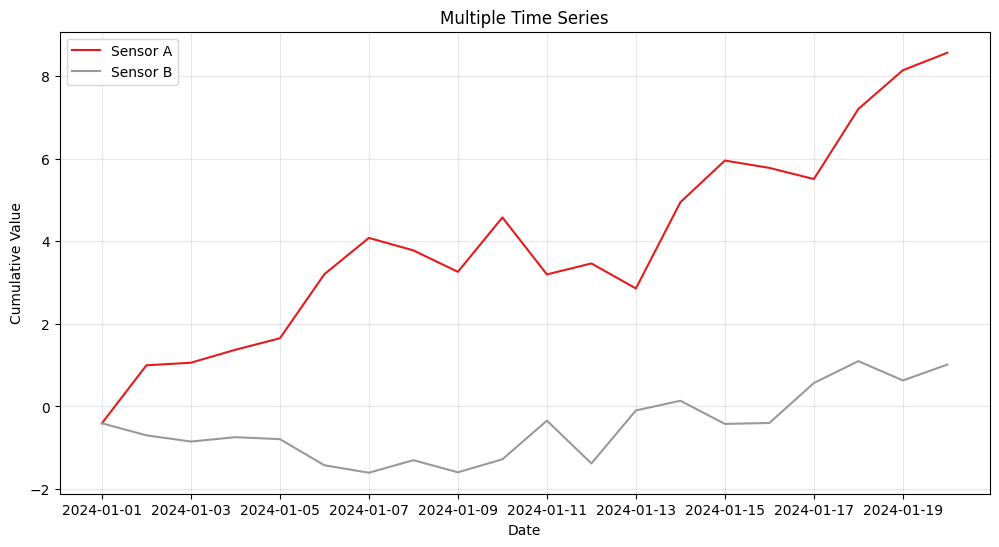

In [2]:
# Create example time series
dates = pd.date_range("2024-01-01", periods=20)
series_a = pd.Series(np.random.randn(20).cumsum(), index=dates)
series_b = pd.Series(np.random.randn(20).cumsum(), index=dates)

fig, _ = DataVisualization.plot_multiple_series(
    series_list=[series_a, series_b],
    labels=["Sensor A", "Sensor B"],
    title="Multiple Time Series",
    xlabel="Date",
    ylabel="Cumulative Value",
)

fig.show()

### Example 2: Using subplots for different groups

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_1.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_2.png'


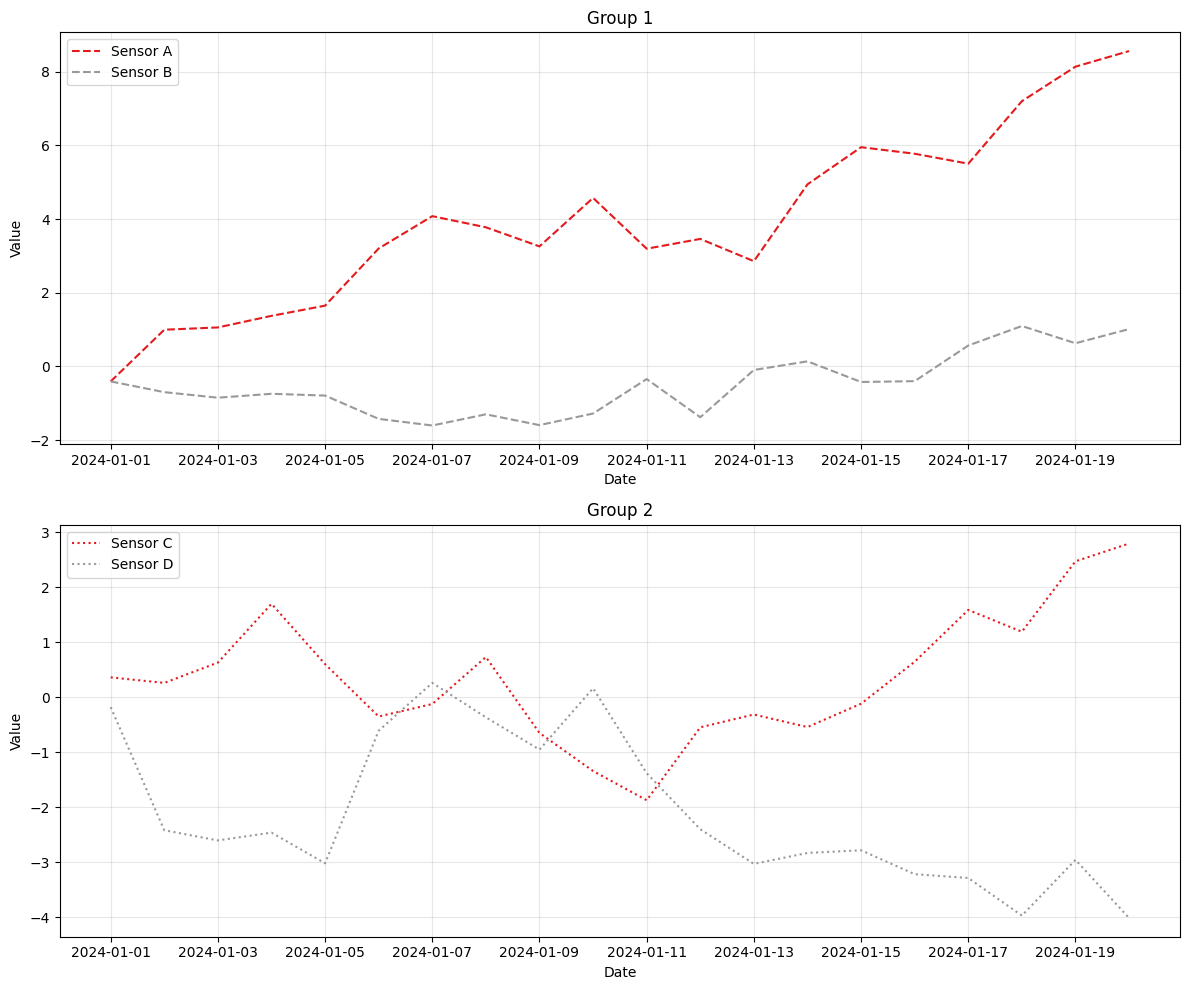

In [3]:
# Create more time series
series_c = pd.Series(np.random.randn(20).cumsum(), index=dates)
series_d = pd.Series(np.random.randn(20).cumsum(), index=dates)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First plot: A and B
DataVisualization.plot_multiple_series(
    series_list=[series_a, series_b],
    labels=["Sensor A", "Sensor B"],
    title="Group 1",
    xlabel="Date",
    ylabel="Value",
    ax=axs[0],
    linestyle="--",
)

# Second plot: C and D
DataVisualization.plot_multiple_series(
    series_list=[series_c, series_d],
    labels=["Sensor C", "Sensor D"],
    title="Group 2",
    xlabel="Date",
    ylabel="Value",
    ax=axs[1],
    linestyle=":",
)

plt.tight_layout()
plt.show()

### Example 3: Trend & Seasonality

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/time_series_with_seasonality_and_noise.png'


/tmp/ipykernel_11944/3576486047.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


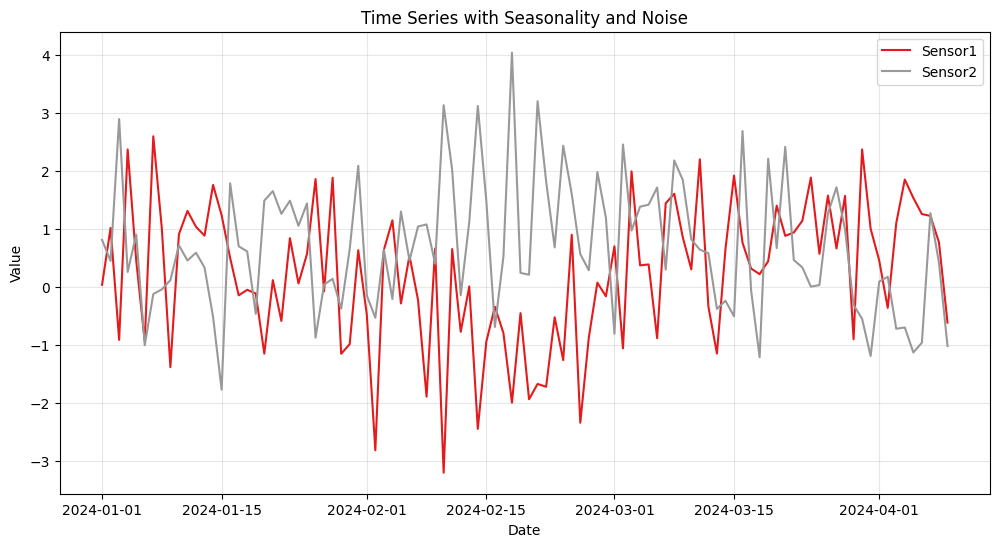

In [4]:
dates = pd.date_range(start="2024-01-01", periods=100)
trend = np.linspace(0, 10, 100)
series_trend = pd.Series(trend, index=dates)

seasonality = np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.normal(0, 1, 100)
series_seasonal_noise = pd.Series(seasonality + noise, index=dates)

seasonality2 = np.sin(np.linspace(0, 1 * np.pi, 100))
noise2 = np.random.normal(0, 1, 100)
series_seasonal_noise2 = pd.Series(seasonality2 + noise2, index=dates)

fig, _ = DataVisualization.plot_multiple_series(
    series_list=[series_seasonal_noise, series_seasonal_noise2],
    labels=["Sensor1", "Sensor2"],
    title="Time Series with Seasonality and Noise",
    xlabel="Date",
    ylabel="Value",
)
fig.show()

### Example 4: Time Series with Missing Values

We introduce some missing values (`NaN`) at specific positions.


DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/time_series_with_missing_values_events.png'


/tmp/ipykernel_11944/301938842.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


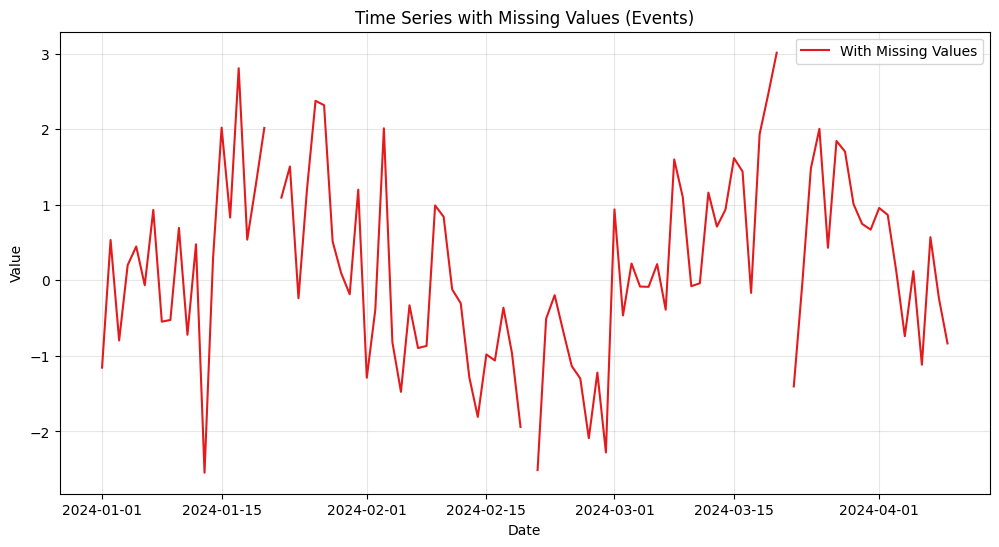

In [5]:
dates = pd.date_range(start="2024-01-01", periods=100)
trend = np.linspace(0, 10, 100)
series_trend = pd.Series(trend, index=dates)

seasonality = np.sin(np.linspace(0, 3 * np.pi, 100))
noise = np.random.normal(0, 1, 100)
series_seasonal_noise = pd.Series(seasonality + noise, index=dates)

series_with_nans = series_seasonal_noise.copy()
series_with_nans.iloc[20] = np.nan
series_with_nans.iloc[50] = np.nan
series_with_nans.iloc[80] = np.nan

fig, _ = DataVisualization.plot_multiple_series(
    series_list=[series_with_nans],
    labels=["With Missing Values"],
    title="Time Series with Missing Values (Events)",
    xlabel="Date",
    ylabel="Value",
)
fig.show()

## Using 3W data as example

We start by importing the required libraries and defining the `DataVisualization` class, which includes the static method `plot_multiple_series`.

In [6]:
import matplotlib.pyplot as plt
from ThreeWToolkit.data_visualization import DataVisualization

Loading the 3W dataset

In [7]:
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset
from pathlib import Path

# define path
dataset_path = Path("/data/3w_dataset")

# create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at /data/3w_dataset
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


2228

In [8]:
sig = ds[123]["signal"].copy()

### Example 1: Simple usage with multiple time series

We generate a random time series with daily frequency. The `plot_multiple_series` method is used to display the values with a custom title and labeled axes.

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/p-anular_p-tpt.png'


/tmp/ipykernel_11944/3446793260.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


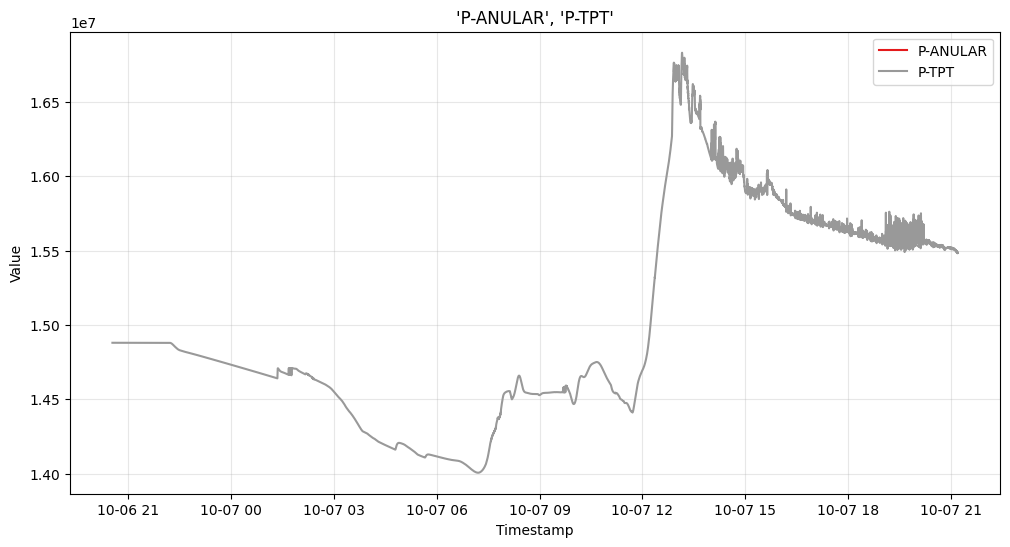

In [9]:
series_list = [sig["P-ANULAR"], sig["P-TPT"]]

fig, _ = DataVisualization.plot_multiple_series(
    series_list=series_list,
    labels=["P-ANULAR", "P-TPT"],
    title="'P-ANULAR', 'P-TPT'",
    xlabel="Timestamp",
    ylabel="Value",
)
fig.show()

### Example 2: Using subplots for different groups

DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_1.png'
DataVisualization: Chart saved to '/home/rafael/pos-doc/repos/3W/toolkit/output/3w_plots/group_2.png'


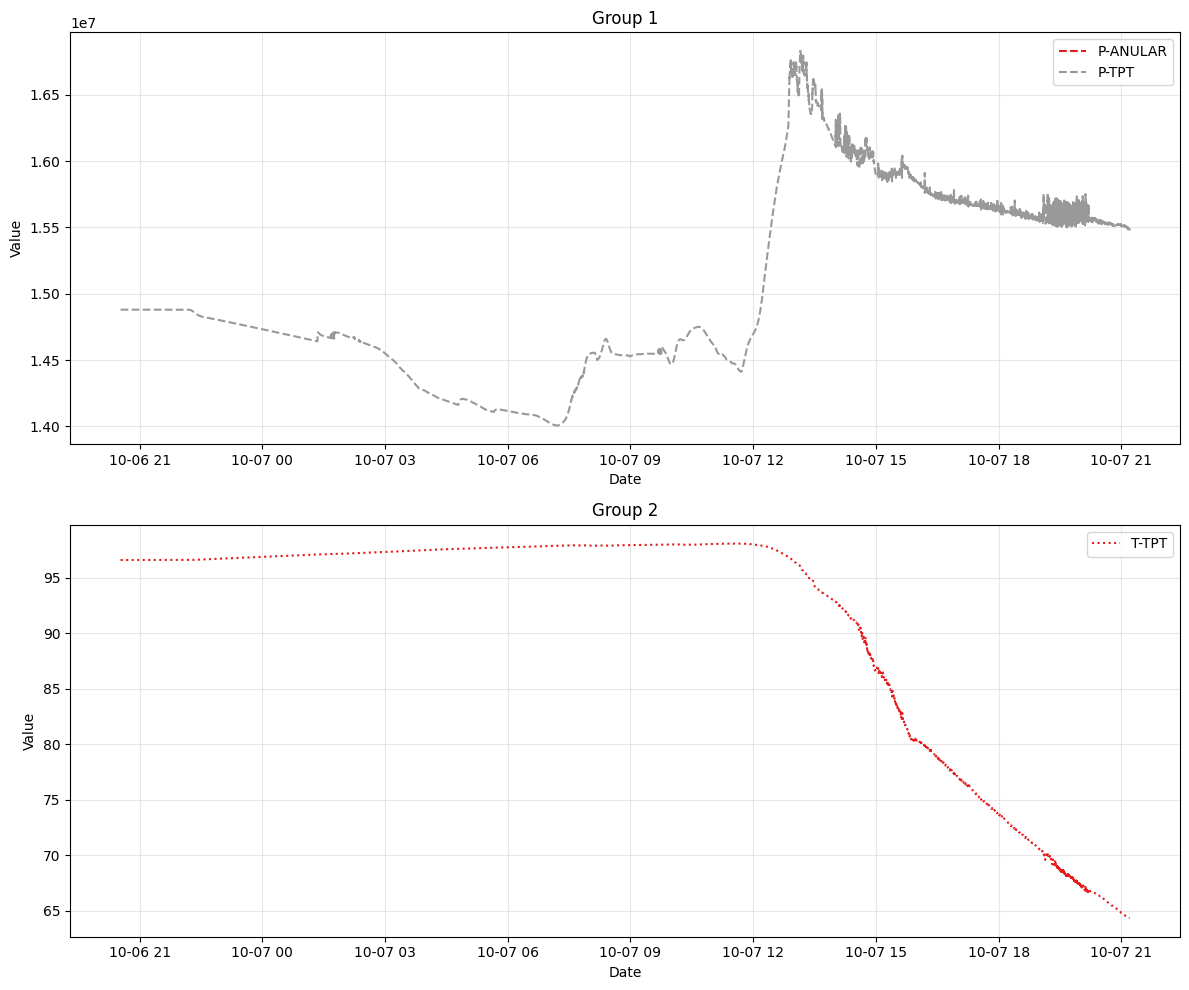

In [10]:
series_list_group1 = [sig["P-ANULAR"], sig["P-TPT"]]
series_list_group2 = [sig["T-TPT"]]


fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# First plot: A and B
DataVisualization.plot_multiple_series(
    series_list=series_list_group1,
    labels=["P-ANULAR", "P-TPT"],
    title="Group 1",
    xlabel="Date",
    ylabel="Value",
    ax=axs[0],
    linestyle="--",
)

# Second plot: C and D
DataVisualization.plot_multiple_series(
    series_list=series_list_group2,
    labels=["T-TPT"],
    title="Group 2",
    xlabel="Date",
    ylabel="Value",
    ax=axs[1],
    linestyle=":",
)

plt.tight_layout()
plt.show()

## Conclusion

The `plot_multiple_series` method provides a clean and reusable way to visualize time series with:

- Custom titles and axis labels,
- Event overlays for missing values,
- Full support for `pandas.Series` with datetime indices.

This makes it a practical tool for time series forecasting, anomaly detection, and reporting in real-world pipelines.
